In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [ ]:
data = pd.read_csv('train.csv')


In [ ]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data) # shuffling the data

data_dev = data[0:1000].T

Y_dev = data_dev[0] #the output is stored in this
X_dev  = data_dev[1:n] #skipping the 0th row because it's the output, they all are pixcel values
X_dev = X_dev / 255 # we get 0 or 1 which helps us in classifcation so like blac
print(X_dev)

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255
print(X_train)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
_,m_train = X_train.shape
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(z):
  return np.maximum(z,0)

def softmax(z):
  A = np.exp(z)/sum(np.exp(z))
  return A


In [ ]:
def forward_prop(W1,b1,W2,b2,X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1,A1,Z2,A2

def ReLU_deriv(Z):
  return Z>0
  # did neurons get activates? (neurons that dont activate dont learn)

def one_hot(Y):
  Y = Y.astype(int)
  one_hot_Y = np.zeros((Y.size,Y.max()+1))
  one_hot_Y[np.arange(Y.size),Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
  one_hot_Y = one_hot(Y) # must have the same shape as A2
  dZ2 = A2 - one_hot_Y # This is the error
  dW2 = 1 / m * dZ2.dot(A1.T) #how much did each weight in W2 contribute to the error?
  # 1/m is done to average over all the training examples
  db2 = 1 / m * np.sum(dZ2) # biases don't connect to inputs, they shift values.
    # Now for the hidden layer:
  dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1) #how much error did each hidden neuron cause?
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1, db1, dW2, db2



In [ ]:
from re import A
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

# alpha (learning rate or step size)
def get_predictons(A2): # turning proabilties into an actual class label
  return np.argmax(A2,0) # returns the index of the largest value
# output is the class label you can compare with Y

def get_accuracy(predictions,Y): # measure of how often the model is right
  print(f"predictions : {predictions} , desired output = {Y}")
  return np.sum(predictions==Y)/Y.size # accuracy = correct_predictions (== checking)/total_pred


def gradient_descent(X,Y,alpha,iterations): # repeatedly adjust the network params so preds get better
  W1,b1,W2,b2 = init_params()
  for i in range(iterations):
    Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
    dW1,db1,dW2,db2 = backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
    W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
    if i%10 ==0:
      print("iteration : ",i)
      predicitons = get_predictons(A2)
      accuracy = get_accuracy(predicitons,Y)
      print(f"Accuracy : {round(accuracy,4)}")
      print("-----------------")

      # every 10 iterations, i print progress, predictions and accuracy
  return W1,b1,W2,b2


In [ ]:
def make_predictions(X,W1,b1,W2,b2): # use after training
  _,_,_,A2 = forward_prop(W1,b1,W2,b2,X)
  predictions = get_predictons(A2)
  return predictions
#run the model forwards and pick the most confident class.
def test_predictions(index,W1,b1,W2,b2):
  current_image = X_train[:,index,None] #extracts one example from my dataset : --> all pixels
  # given this image, what digits is it?
  prediciton = make_predictions(X_train[:,index,None],W1,b1,W2,b2)
  label = Y_train[index] # get the true label
  print("Prediction : ",prediciton)
  print("label:",label)
  current_image = current_image.reshape((28,28)) * 255
  plt.gray()
  plt.imshow(current_image ,interpolation = 'nearest')
  #imshow --> image show takes a 2D array of numbers and displays it as an image
  # nearest --> each pixel stays a sharp square, no smoothing
  plt.show()

iteration :  0
predictions : [0 6 0 ... 0 0 0] , desired output = [1 5 5 ... 8 0 0]
Accuracy : 0.1006
-----------------
iteration :  10
predictions : [1 6 3 ... 0 0 0] , desired output = [1 5 5 ... 8 0 0]
Accuracy : 0.1264
-----------------
iteration :  20
predictions : [1 8 3 ... 0 0 0] , desired output = [1 5 5 ... 8 0 0]
Accuracy : 0.1962
-----------------
iteration :  30
predictions : [1 8 8 ... 0 0 0] , desired output = [1 5 5 ... 8 0 0]
Accuracy : 0.2492
-----------------
iteration :  40
predictions : [1 8 8 ... 0 0 0] , desired output = [1 5 5 ... 8 0 0]
Accuracy : 0.2756
-----------------
iteration :  50
predictions : [1 6 6 ... 0 0 0] , desired output = [1 5 5 ... 8 0 0]
Accuracy : 0.3158
-----------------
iteration :  60
predictions : [1 2 6 ... 7 0 0] , desired output = [1 5 5 ... 8 0 0]
Accuracy : 0.3697
-----------------
iteration :  70
predictions : [1 2 6 ... 7 0 0] , desired output = [1 5 5 ... 8 0 0]
Accuracy : 0.4208
-----------------
iteration :  80
predictions : [1 

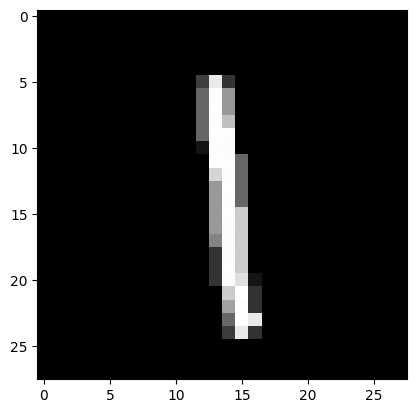

Prediction :  [3]
label: 5


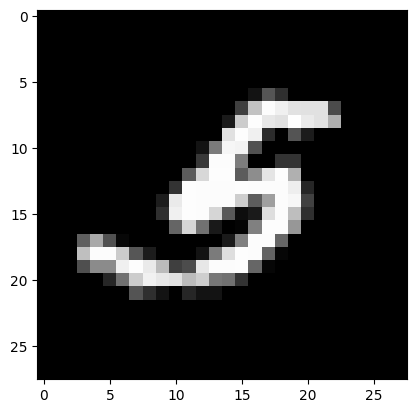

Prediction :  [8]
label: 5


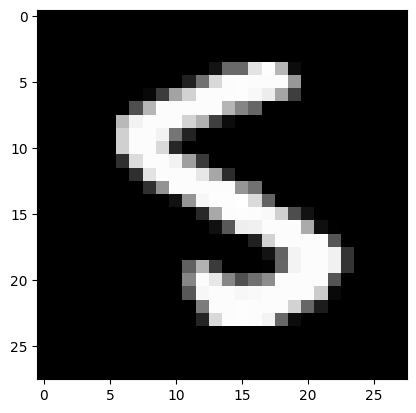

Prediction :  [3]
label: 5


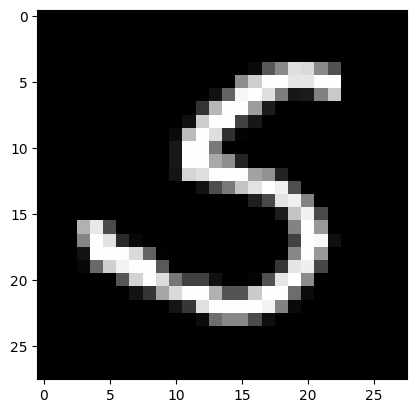

Prediction :  [4]
label: 4


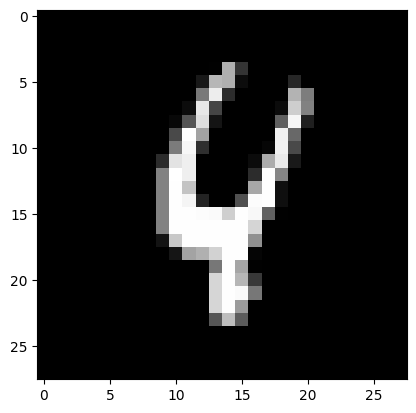

predictions : [0 6 5 4 9 9 3 6 1 9 1 1 1 3 6 1 6 1 1 2 9 9 3 3 0 8 9 3 8 1 0 1 0 4 1 1 5
 4 4 4 0 0 0 8 0 6 8 8 2 2 1 5 7 8 6 3 6 8 8 9 5 9 1 7 3 4 6 9 1 2 1 8 7 5
 7 5 0 2 0 4 7 2 1 5 6 7 7 4 8 1 1 2 0 2 3 9 1 8 4 4 8 1 4 4 1 1 4 1 8 6 0
 1 3 2 5 9 7 9 6 3 7 8 4 2 8 7 4 8 5 3 5 1 6 9 1 3 3 4 1 7 6 0 4 6 7 1 2 4
 0 9 6 7 4 7 7 6 6 2 3 1 2 5 5 8 6 3 4 4 9 1 5 1 8 5 5 2 9 1 2 4 4 6 7 4 5
 6 4 8 2 0 7 1 5 8 6 0 0 6 4 6 4 9 1 7 9 7 5 8 1 3 4 6 4 8 4 0 2 1 8 1 7 3
 3 3 2 8 9 8 9 6 7 0 2 4 9 4 5 9 3 1 7 1 9 9 6 6 8 3 4 4 8 3 1 4 3 1 2 9 4
 6 0 6 1 5 9 1 7 2 6 4 3 9 3 5 3 2 3 3 2 7 9 0 1 9 9 9 0 3 5 4 6 4 5 9 7 1
 9 6 7 2 2 4 8 2 0 2 0 7 3 7 5 8 9 8 4 8 0 6 6 4 4 3 3 6 5 2 5 7 2 5 0 4 3
 9 9 7 7 8 6 3 4 3 9 0 9 0 5 7 4 9 1 1 1 5 1 3 9 7 2 0 0 0 9 9 2 3 1 5 4 2
 8 9 4 3 1 6 4 3 4 2 9 9 4 5 4 6 2 4 0 0 4 6 1 9 1 7 2 3 9 1 8 5 0 0 0 7 2
 1 4 8 3 0 7 3 3 3 7 3 0 8 2 0 4 0 1 9 5 7 9 8 3 5 1 1 7 7 7 7 0 1 5 2 5 9
 8 1 2 4 8 6 5 6 3 2 9 0 7 5 8 8 5 5 7 6 3 5 9 9 7 7 0 9 4 7 3 0 0 6 3 6 2
 4 7 1 9 7 

In [ ]:
W1,b1,W2,b2 = gradient_descent(X_train,Y_train,0.1,530)
# now the network has learned patterns

test_predictions(0,W1,b1,W2,b2)
test_predictions(1,W1,b1,W2,b2)
test_predictions(2,W1,b1,W2,b2)
test_predictions(3,W1,b1,W2,b2)
test_predictions(4,W1,b1,W2,b2)

dev_pred = make_predictions(X_dev, W1,b1,W2,b2)
accuracy = get_accuracy(dev_pred,Y_dev)
print(f"Accuracy on the testing data set : {accuracy}")